# IMPORT LIBRARIES AND DATASET

In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import random 

import os
import cv2
#import gdown
#from zipfile import ZipFile
from tensorflow.keras import layers
from tensorflow import keras
from tqdm import tqdm

import gc


0

In [ ]:
os.makedirs("celeba_gan")
#pip install gdown

In [ ]:
#os.makedirs("celeba_gan")

url = "https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684"
url = "https://cseweb.ucsd.edu/~weijian/static/datasets/celeba/img_align_celeba.zip"
output = "celeba_gan/data.zip"
gdown.download(url, output, quiet=True)

with ZipFile("celeba_gan/data.zip", "r") as zipobj:
    zipobj.extractall("celeba_gan")

In [22]:
folder = 'celeba_gan/img_align_celeba'
samples = os.listdir(folder)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc36985b130>,
 <matplotlib.image.AxesImage at 0x7fc3698117f0>)

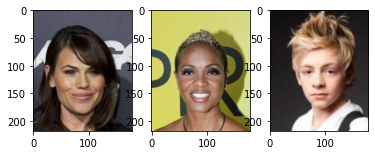

In [3]:
folder = 'celeba_gan/img_align_celeba'
samples = os.listdir(folder)
#print(samples)

img = cv2.cvtColor(cv2.imread(os.path.join(folder, np.random.choice(samples))), cv2.COLOR_BGR2RGB)
plt.subplot(131), plt.imshow(img)
img = cv2.cvtColor(cv2.imread(os.path.join(folder, np.random.choice(samples))), cv2.COLOR_BGR2RGB)
plt.subplot(132), plt.imshow(img)
img = cv2.cvtColor(cv2.imread(os.path.join(folder, np.random.choice(samples))), cv2.COLOR_BGR2RGB)
plt.subplot(133), plt.imshow(img)

In [4]:
#size = 64 
# new size 178×218
x, y = [],[]
t= []
i=0
for sample in tqdm(samples):
    i=i +1
    if i > 2011:
        break
    img = cv2.cvtColor(cv2.imread(os.path.join(folder, sample)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (176, 216))
    if i > 2001:
        t.append(img)
    if i < 2001:  
        x.append(img)
  

  1%|          | 2011/202599 [00:04<07:10, 466.29it/s]


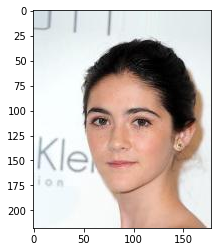

In [4]:
plt.imshow(x[0])

# Preprocessing data

In [5]:
X_train = np.array(x)/255

del x
gc.collect()

X_test = np.array(t)/255

del t
gc.collect()


0

In [23]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [24]:
noise_dataset = np.array(noise_dataset)
noise_dataset.shape

(2000, 216, 176, 3)

11633

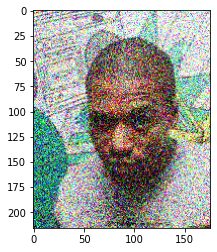

In [25]:
plt.imshow(noise_dataset[22], cmap="gray")
gc.collect()

In [26]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10, 216, 176, 3)

In [10]:
gc.collect()

2409

BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.”

In [27]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(216, 176, 3)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


In [28]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 108, 88, 16)       448       
                                                                 
 conv2d_4 (Conv2D)           (None, 54, 44, 8)         1160      
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 44, 8)         584       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 108, 88, 16)      1168      
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 216, 176, 3)      435       
 ranspose)                                                       
                                                                 
Total params: 3,795
Trainable params: 3,795
Non-traina

In [29]:
autoencoder.fit(noise_dataset.reshape(-1, 216, 176, 3),          
                X_train.reshape(-1, 216, 176, 3), 
                epochs=10, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 216, 176, 3), X_test.reshape(-1, 216, 176, 3)))


Epoch 1/10
10/10 [==============================] - 3s 175ms/step - loss: 0.6903 - val_loss: 0.6861
Epoch 2/10
10/10 [==============================] - 2s 159ms/step - loss: 0.6803 - val_loss: 0.6770
Epoch 3/10
10/10 [==============================] - 2s 159ms/step - loss: 0.6662 - val_loss: 0.6581
Epoch 4/10
10/10 [==============================] - 2s 162ms/step - loss: 0.6379 - val_loss: 0.6233
Epoch 5/10
10/10 [==============================] - 2s 159ms/step - loss: 0.5965 - val_loss: 0.5855
Epoch 6/10
10/10 [==============================] - 2s 154ms/step - loss: 0.5471 - val_loss: 0.5525
Epoch 7/10
10/10 [==============================] - 2s 160ms/step - loss: 0.5194 - val_loss: 0.5451
Epoch 8/10
10/10 [==============================] - 2s 159ms/step - loss: 0.5132 - val_loss: 0.5405
Epoch 9/10
10/10 [==============================] - 2s 190ms/step - loss: 0.5088 - val_loss: 0.5385
Epoch 10/10
10/10 [==============================] - 2s 168ms/step - loss: 0.5070 - val_loss: 0.5378

 EVALUATE TRAINED MODEL PERFORMANCE

In [30]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 216, 176, 3), X_test.reshape(-1, 216, 176, 3))
print('Test Accuracy : {:.3f}'.format(evaluation))

1/1 [==============================] - 0s 24ms/step - loss: 0.5378
Test Accuracy : 0.538


In [31]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 216, 176, 3))

1/1 [==============================] - 0s 75ms/step


In [44]:
blured_test_set = []
for img in noise_test_set:
  blured_image = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
  blured_test_set.append(blured_image)
  
blured_test_set = np.array(blured_test_set)
blured_test_set.shape

(10, 216, 176, 3)

In [45]:
predicted.shape

(10, 216, 176, 3)

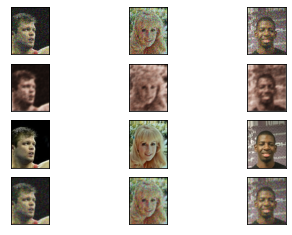

In [47]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
for images, row in zip([noise_test_set[:3], predicted, X_test, blured_test_set], axes):
    for img, ax in zip(images, row):
        #ax.imshow(img.reshape((216, 64)))
        ax.imshow(img.reshape((216, 176, 3)))        
        #ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

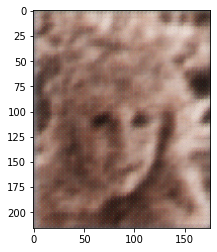

In [34]:
plt.imshow(predicted[1])

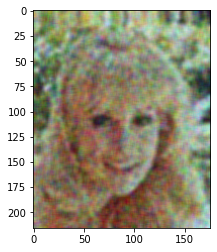

In [48]:
plt.imshow(blured_test_set[1])

As the result, it makes sense to use convolutional neural networks as encoders and decoders. However, the convolutional autoencoders generate a very blured version of the original image.

Compared to the Gaussian bluring, the results with convolutional networks are in my opinion better in case of heavy noice. 

In case of not buch noice on the images, it is most likely better to use Gaussian bluring.